Question 7:

In [1]:
#lets import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
folder_path = "/content/drive/MyDrive/AML/HW3/Q1/360"
%cd {folder_path}
train_path = "/content/drive/MyDrive/AML/HW3/Q1/360/"
valid_path = "/content/drive/MyDrive/AML/HW3/Q1/120/"
from keras import regularizers
from keras import models
from sklearn.preprocessing import StandardScaler
import time

Mounted at /content/drive
/content/drive/MyDrive/AML/HW3/Q1


In [2]:
height,width,channels=400,400,1

In [2]:
#load images
def load_images(folder_path):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
      if filename.endswith(".jpg"):
        img = cv2.imread(os.path.join(folder_path, filename))
        label = filename[0] # Extract first character which helps␣
        img = cv2.resize(img, (400,400))
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

In [74]:
#split our data
X_train, y_train = load_images(train_path)
X_val, y_val = load_images(valid_path)


# scaling it btw 0-1, we divide it by 255 as its the max value for a pixel
X_train = X_train / 255.0
X_val = X_val / 255.0

In [75]:
# convert images to grayscale
def to_gray(images):
  gray_images = [cv2.cvtColor(cv2.convertScaleAbs(img), cv2.COLOR_BGR2GRAY) for img in images]
  return gray_images


# standardize the data
def standardize(images):
  #flatten the data
  flattened_images = [img.flatten() for img in images]
  X = np.array(flattened_images)
  #scale the data using standard scaler
  scaler = StandardScaler()
  X_standardized = scaler.fit_transform(X)
  return X_standardized

In [76]:
# Convert images to grayscale
X_train = to_gray(X_train)
# Standardize the grayscale images

X_train = standardize(X_train)
# Convert images to grayscale
X_val = to_gray(X_val)
# Standardize the grayscale images
X_val = standardize(X_val)

In [42]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

#label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.fit_transform(y_val)

# convert to one_hot
y_train_one_hot = to_categorical(y_train_encoded, num_classes=3)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=3)

y_train, y_val = y_train.flatten(), y_val.flatten()

In [156]:
# define our model

height,width,channels=400,400,1


model = models.Sequential()
model.add(layers.Flatten(input_shape=X_train[0].shape))
model.add(layers.Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.05)))
model.add(layers.Dense(64, activation='relu')),
model.add(layers.Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.05)))   # 8 neurons in last-1 layer
model.add(layers.Dense(3, activation='softmax'))# 3 neurons in last layer

In [157]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [158]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
start_time = time.time()
print("Trainign Begins")
history = model.fit(X_train, y_train_one_hot,validation_data=(X_val, y_val_one_hot),epochs=30, batch_size=32)

# Record the end time
print("Training ends/n")
end_time = time.time()
print("Total time" ,(end_time -start_time))

Trainign Begins
Epoch 1/30
12/12 [==============================] - 9s 739ms/step - loss: 4.2580 - accuracy: 0.3361 - val_loss: 2.9405 - val_accuracy: 0.3083
Epoch 2/30
12/12 [==============================] - 10s 834ms/step - loss: 2.2285 - accuracy: 0.3639 - val_loss: 1.9798 - val_accuracy: 0.2750
Epoch 3/30
12/12 [==============================] - 8s 623ms/step - loss: 1.8293 - accuracy: 0.3806 - val_loss: 1.7041 - val_accuracy: 0.3250
Epoch 4/30
12/12 [==============================] - 11s 892ms/step - loss: 1.6618 - accuracy: 0.3889 - val_loss: 1.6125 - val_accuracy: 0.3000
Epoch 5/30
12/12 [==============================] - 9s 773ms/step - loss: 1.5863 - accuracy: 0.3333 - val_loss: 1.5405 - val_accuracy: 0.3083
Epoch 6/30
12/12 [==============================] - 10s 800ms/step - loss: 1.5077 - accuracy: 0.3250 - val_loss: 1.4771 - val_accuracy: 0.3167
Epoch 7/30
12/12 [==============================] - 9s 716ms/step - loss: 1.4557 - accuracy: 0.3917 - val_loss: 1.4313 - val_accu

Question 7 A:
Total time 1243.2983515262604

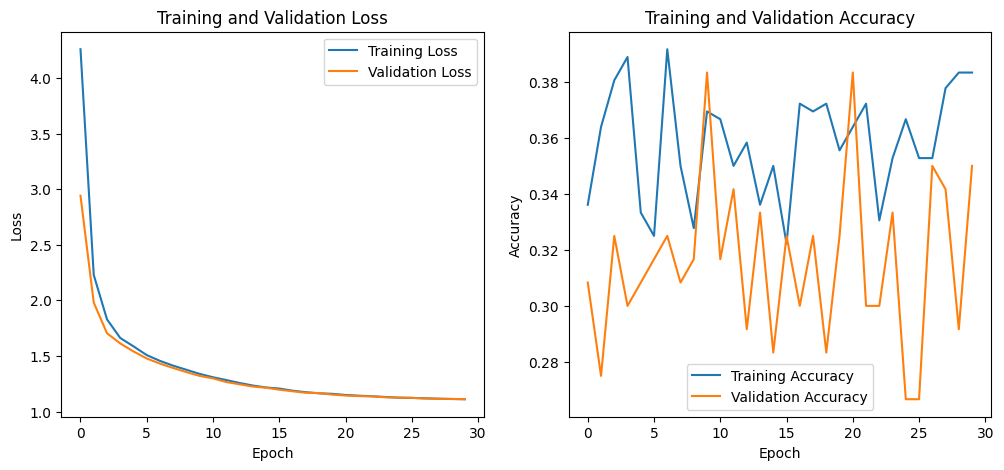

In [159]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The training and validation accuracy plot does seem a little wierd, but because we have built a model that is fairly simpler with data that has only around 360 images, there are chances of model not capturing the entire variance in the data. Perhaps a better model and access to GPU with lots of rock images might help us train a better model.

In [160]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 160000)            0         
                                                                 
 dense_37 (Dense)            (None, 100)               16000100  
                                                                 
 dense_38 (Dense)            (None, 64)                6464      
                                                                 
 dense_39 (Dense)            (None, 8)                 520       
                                                                 
 dense_40 (Dense)            (None, 3)                 27        
                                                                 
Total params: 16007111 (61.06 MB)
Trainable params: 16007111 (61.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Total parameters: 16007111

Trainable Parameters: 16007111

Bias params : 175

In [161]:
#extract the last -1 model weights and predict the values
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)
intermediate_output = intermediate_layer_model.predict(X_train)

12/12 [==============================] - 2s 119ms/step


In [162]:
intermediate_output

array([[0.        , 0.03961407, 0.02701724, ..., 0.01970244, 0.00707483,
        0.        ],
       [0.        , 0.03885668, 0.02765423, ..., 0.01913757, 0.00715571,
        0.        ],
       [0.        , 0.03585506, 0.02581708, ..., 0.01945174, 0.00665932,
        0.        ],
       ...,
       [0.        , 0.03335616, 0.02172653, ..., 0.02114686, 0.00556673,
        0.        ],
       [0.        , 0.0347882 , 0.02229385, ..., 0.02125981, 0.00576035,
        0.        ],
       [0.        , 0.03928898, 0.02848026, ..., 0.01894047, 0.00796087,
        0.        ]], dtype=float32)

In [163]:
#read the given data
human_data_360 = np.loadtxt("/content/mds_360.txt")
human_data_120 = np.loadtxt("/content/mds_120.txt")

In [164]:
human_data_360

array([[-3.743, -1.204,  2.001, ..., -1.992,  4.95 ,  1.695],
       [ 2.332,  1.625,  0.985, ...,  0.093,  6.724,  0.708],
       [ 0.346,  1.49 , -3.795, ..., -3.786,  0.706, -2.854],
       ...,
       [-3.475, -3.431, -2.184, ..., -2.265,  1.129, -1.201],
       [-0.051, -2.358,  1.994, ...,  7.268, -0.593, -1.432],
       [ 1.134, -4.9  ,  0.983, ...,  4.695,  0.624, -1.195]])

In [165]:
np.unique(intermediate_output)

array([0.        , 0.00116988, 0.00165255, ..., 0.0438983 , 0.04653567,
       0.04708417], dtype=float32)

In [176]:
from scipy.spatial import procrustes
train_mtx1, train_mtx2, train_disparity = procrustes( human_data_360,intermediate_output)
train_disparity

0.9942420689377564

In [177]:
correlation_matrix = np.corrcoef(train_mtx1, train_mtx2, rowvar=False)
# Extract the correlation coefficients
correlation_coefficient = correlation_matrix[:train_mtx1.shape[1], train_mtx1.shape[1]:]
# Display the result
print("Correlation Coefficients")
pd.DataFrame(correlation_coefficient)

Correlation Coefficients


,0,1,2,3,4,5,6,7
0,0.068537,0.062101,-0.054877,0.051291,-0.058181,-0.053973,0.061802,0.026361
1,0.058438,0.061345,-0.051852,0.044545,-0.054332,-0.043723,0.061538,0.059643
2,-0.018101,-0.018176,0.073481,-0.013048,0.016338,0.010146,-0.017130,-0.031352
3,0.080602,0.074389,-0.062162,0.110924,-0.091120,-0.105165,0.073801,0.081870
4,-0.031490,-0.031250,0.026808,-0.031383,0.031938,0.032002,-0.030576,-0.029323
5,-0.065858,-0.056695,0.037534,-0.081657,0.072147,0.096604,-0.050219,-0.021822
6,0.072839,0.077076,-0.061207,0.055350,-0.066582,-0.048507,0.079607,0.081515
7,0.006976,0.016772,-0.025153,0.013786,-0.014337,-0.004733,0.018302,0.063186


In [178]:
intermediate_output_val = intermediate_layer_model.predict(X_val)

1/4 [======>.......................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 0s 45ms/step


In [179]:
val_mtx1, val_mtx2, val_disparity = procrustes(human_data_120, intermediate_output_val)
val_disparity

0.9907676903243698

In [180]:
correlation_matrix = np.corrcoef(val_mtx1, val_mtx2, rowvar=False)
# Extract the correlation coefficients
correlation_coefficient = correlation_matrix[:val_mtx1.shape[1], val_mtx1.shape[1]:]
# Display the result
print("Correlation Coefficients between corresponding dimensions: t-SNE")
pd.DataFrame(correlation_coefficient)

Correlation Coefficients between corresponding dimensions: t-SNE


,0,1,2,3,4,5,6,7
0,0.126377,-0.131379,-0.112503,0.109645,-0.105722,-0.034767,0.063237,0.103313
1,-0.053632,0.071768,0.041707,-0.039592,0.042136,0.020306,-0.078402,-0.040413
2,-0.137876,0.125210,0.149034,-0.123189,0.147282,0.071028,-0.060089,-0.095588
3,0.093885,-0.083046,-0.086070,0.103300,-0.083796,-0.022000,-0.023299,0.117905
4,-0.090885,0.088732,0.103312,-0.084128,0.111598,0.052943,-0.068036,-0.072278
5,-0.004442,0.006355,0.007405,-0.003283,0.007869,0.039888,-0.022451,0.001956
6,0.012414,-0.037703,-0.009625,-0.005342,-0.015537,-0.034495,0.111549,-0.013123
7,0.031577,-0.030258,-0.023839,0.042086,-0.025698,0.004679,-0.020433,0.061983
